## **Data Exploration**

In [1]:
import numpy as np
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
data = pd.read_csv('cardio_train.csv', sep=';')

In [4]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
data = data.drop('id', axis=1)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
print(data.isnull().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


## **Removing Outliers**

In [8]:
data.drop(data[(data['height'] > data['height'].quantile(0.99)) | (data['height'] < data['height'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['weight'] > data['weight'].quantile(0.99)) | (data['weight'] < data['weight'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_hi'] > data['ap_hi'].quantile(0.99)) | (data['ap_hi'] < data['ap_hi'].quantile(0.01))].index,inplace=True)
data.drop(data[(data['ap_lo'] > data['ap_lo'].quantile(0.99)) | (data['ap_lo'] < data['ap_lo'].quantile(0.01))].index,inplace=True)
len(data)

66532

In [9]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,19471.713146,1.348900,164.465460,73.837733,126.624902,90.024680,1.362337,1.224103,0.087371,0.053057,0.804260,0.496814
std,2463.232418,0.476626,7.311396,12.902688,16.032104,89.202894,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994
min,10798.000000,1.000000,147.000000,48.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17674.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21325.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,184.000000,117.000000,180.000000,1000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


## **Data Transformation**

In [10]:
data['age'] = (data['age'] / 365).round().astype('int')

print(data.head())

   age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0   50       2     168    62.0    110     80            1     1      0     0   
1   55       1     156    85.0    140     90            3     1      0     0   
2   52       1     165    64.0    130     70            3     1      0     0   
3   48       2     169    82.0    150    100            1     1      0     0   
4   48       1     156    56.0    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [11]:
# # Define the bin edges and labels
age_edges = [30, 35, 40, 45, 50, 55, 60, 65]
age_labels = [0, 1, 2, 3, 4, 5, 6]

#  bin in  5 years span
data['age_group'] = pd.cut(data['age'], bins=7, labels=range(7), include_lowest=True,right=True)
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3


In [12]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data.head()

bmiMin = int(data['bmi'].min())
bmiMax = int(data['bmi'].max())

print(bmiMin, bmiMax)

data['bmi'] = pd.cut(data['bmi'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()


data["bmi"].value_counts(normalize=True)

15 52


1    0.536013
2    0.300833
3    0.092061
0    0.053448
4    0.016488
5    0.001157
Name: bmi, dtype: float64

In [13]:
data['map'] = ((2* data['ap_lo']) + data['ap_hi']) / 3

mapMin = int(data['map'].min())
mapMax = int(data['map'].max())

print(mapMin, mapMax)

data['map'] = pd.cut(data['map'], bins=6, labels=range(6), right=True, include_lowest=True)

data.head()

70 726


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,50,2,168,62.0,110,80,1,1,0,0,1,0,3,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1,4,3,0
2,52,1,165,64.0,130,70,3,1,0,0,0,1,4,1,0
3,48,2,169,82.0,150,100,1,1,0,0,1,1,3,2,0
4,48,1,156,56.0,100,60,1,1,0,0,0,0,3,1,0


In [14]:
null_rows = data[data.isnull().any(axis=1)]
print("Rows with null values:")
print(null_rows)

Rows with null values:
Empty DataFrame
Columns: [age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active, cardio, age_group, bmi, map]
Index: []


In [15]:
data=data.drop(['height','weight','ap_hi','ap_lo','age'],axis=1)

data.head()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,2,1,1,0,0,1,0,3,1,0
1,1,3,1,0,0,1,1,4,3,0
2,1,3,1,0,0,0,1,4,1,0
3,2,1,1,0,0,1,1,3,2,0
4,1,1,1,0,0,0,0,3,1,0


In [16]:
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from kmodes.kmodes import KModes
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.describe()

,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
count,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000,66532.000000
mean,0.348900,0.362337,0.224103,0.087371,0.053057,0.804260,0.496814,4.044144,1.485601,0.038012
std,0.476626,0.677522,0.570326,0.282381,0.224149,0.396773,0.499994,1.379105,0.808479,0.386662
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,5.000000,2.000000,0.000000
max,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,4.000000


## **Clustering**

In [18]:
cost = []
num_clusters = range(1,9) # 1 to 8
for i in list(num_clusters):
    kmode = KModes(n_clusters=i, init = "Huang", n_init = 8, verbose=0,random_state=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

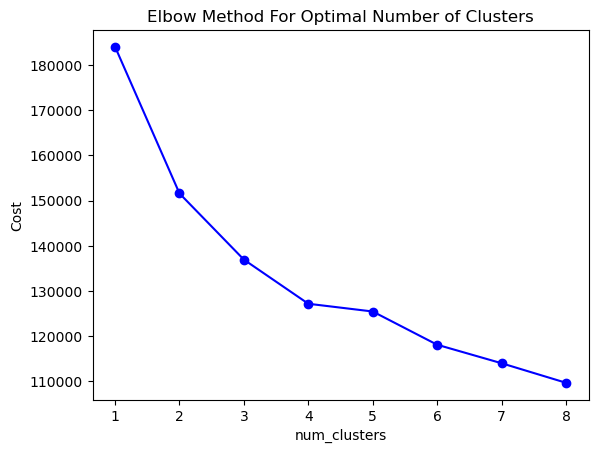

In [19]:
plt.plot(num_clusters, cost, 'bo-')
plt.xlabel('num_clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [20]:
km = KModes(n_clusters=2, init = "Huang", n_init = 8,random_state=42)
clusters = km.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 0], dtype=uint16)

In [21]:
data.insert(0,"clusters",clusters,True)

data.head()

,clusters,gender,cholesterol,gluc,smoke,alco,active,cardio,age_group,bmi,map
0,0,1,0,0,0,0,1,0,3,1,0
1,0,0,2,0,0,0,1,1,4,3,0
2,0,0,2,0,0,0,0,1,4,1,0
3,1,1,0,0,0,0,1,1,3,2,0
4,0,0,0,0,0,0,0,0,3,1,0


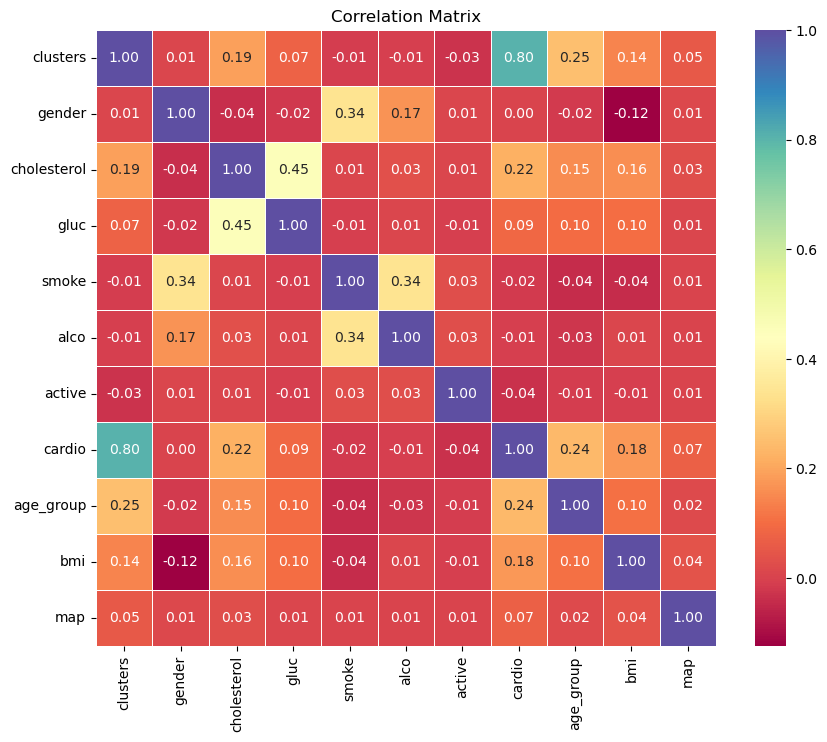

In [22]:
# Set up figure
plt.figure(figsize=(10, 8))

# Draw correlation matrix
sns.heatmap(data.corr(), annot=True, cmap='Spectral', fmt=".2f", linewidths=.5)

# Show the figure
plt.title('Correlation Matrix')
plt.show()

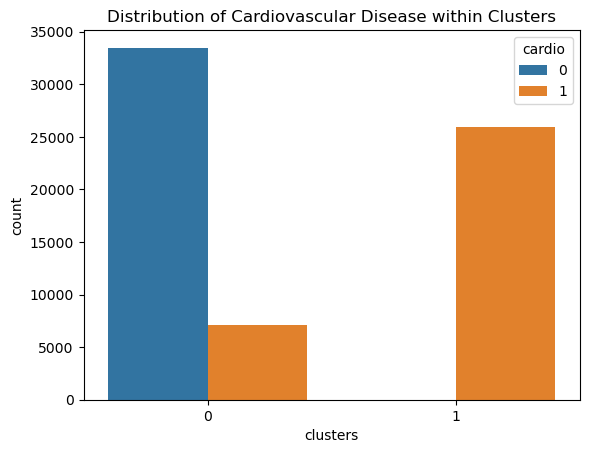

In [23]:
sns.countplot(x='clusters', hue='cardio', data=data)
plt.title('Distribution of Cardiovascular Disease within Clusters')
plt.show()

## **Split and Train Data**

In [24]:
x = data.drop(['cardio', 'gender', 'alco', 'smoke'], axis=1)
y = data['cardio']

In [25]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66532 entries, 0 to 69999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   clusters     66532 non-null  uint16
 1   cholesterol  66532 non-null  int64 
 2   gluc         66532 non-null  int64 
 3   active       66532 non-null  int64 
 4   age_group    66532 non-null  int64 
 5   bmi          66532 non-null  int64 
 6   map          66532 non-null  int64 
dtypes: int64(6), uint16(1)
memory usage: 3.7 MB


In [28]:
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler

In [29]:
# Scale the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Oversample the minority class
majority_class_indices = np.where(y == 0)[0]
minority_class_indices = np.where(y == 1)[0]

majority_class_samples = x_scaled[majority_class_indices]
minority_class_samples = x_scaled[minority_class_indices]
minority_class_samples_upsampled = resample(minority_class_samples,
                                            replace=True,
                                            n_samples=len(majority_class_samples),
                                            random_state=42)

# Concatenate the upsampled minority class samples with the original majority class samples
x_augmented = np.concatenate((majority_class_samples, minority_class_samples_upsampled), axis=0)

# Create the corresponding target labels for the augmented data
y_majority = np.zeros(len(majority_class_samples))
y_minority_upsampled = np.ones(len(minority_class_samples_upsampled))
y_augmented = np.concatenate((y_majority, y_minority_upsampled), axis=0)

# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)


In [30]:
# Add Gaussian noise and feature scaling/shifting
noise = np.random.normal(0, 0.1, size=x_augmented.shape)
x_augmented_noisy = x_augmented + noise
x_augmented_scaled = x_augmented_noisy * np.random.uniform(0.9, 1.1, size=x_augmented_noisy.shape)

# Split the augmented data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_augmented_scaled, y_augmented, test_size=0.2, random_state=42)

print("Training data (x):")
print(x_train)
print("\nTraining data (y):")
print(y_train)
print("\nTesting data (x):")
print(x_test)
print("\nTesting data (y):")
print(y_test)

Training data (x):
[[ 1.34605909 -0.5796642   1.28522867 ...  1.56206036 -0.48733174
  -0.26779313]
 [-0.86708325 -0.54166986 -0.39285242 ... -0.1403186  -0.61977843
  -0.06309843]
 [-0.76033216 -0.3537208  -0.40666069 ... -0.12832571 -0.59814758
  -0.16271363]
 ...
 [ 1.3230828   2.23213857 -0.51734561 ...  1.58638758  0.54824034
  -0.19599155]
 [-0.75140634 -0.47307878 -0.45957157 ... -0.6458972   0.59725774
  -0.0356261 ]
 [-0.84313845 -0.64750894 -0.49035959 ... -0.78177631 -0.78159163
  -0.17963687]]

Training data (y):
[1. 1. 0. ... 1. 0. 0.]

Testing data (x):
[[ 1.18438389 -0.59577157 -0.5603865  ...  0.63595953  0.67217819
  -0.07660526]
 [ 1.05602483  1.06533793 -0.26975812 ...  0.75861566  0.64907335
  -0.21716764]
 [-0.75112829  2.15246884 -0.53055892 ... -0.68596369 -0.57815188
  -0.08814384]
 ...
 [ 1.24049938  0.9723179  -0.44655102 ...  0.77007302 -0.64509783
  -0.07354287]
 [ 1.27836311 -0.34848617 -0.40897401 ...  1.47578933  0.33503727
  -0.08768105]
 [-0.87321491 -0

In [31]:
# # Split the augmented data into train and test sets
# x_train, x_test, y_train, y_test = train_test_split(x_augmented_smote, y_augmented_smote, test_size=0.2, random_state=42)

# print("Training data (x):")
# print(x_train)
# print("\nTraining data (y):")
# print(y_train)
# print("\nTesting data (x):")
# print(x_test)
# print("\nTesting data (y):")
# print(y_test)

In [32]:
from sklearn.ensemble import RandomForestClassifier

### **RNN MODEL**

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, ReLU

In [34]:
torch.cuda.is_available()

False

In [35]:
# Define the RNN model architecture
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(input_size=7, hidden_size=16, num_layers=1, batch_first=True)
        self.fc = nn.Linear(16, 1)

    def forward(self, x):
        out, _ = self.rnn(x)
        # If out has 3 dimensions, select the last time step output
        if len(out.shape) == 3:
            out = self.fc(out[:, -1, :])
        # If out has 2 dimensions (sequence length is 1), directly pass through the fully connected layer
        elif len(out.shape) == 2:
            out = self.fc(out)
        out = torch.sigmoid(out)
        return out




In [36]:
# Create the KDNN model using Keras
def create_kdnn_model():
    model = Sequential()
    model.add(Dense(16, input_dim=7))
    model.add(ReLU())
    model.add(Dense(12))
    model.add(ReLU())
    model.add(Dense(8))
    model.add(ReLU())
    model.add(Dense(4))
    model.add(ReLU())
    model.add(Dense(1, activation='sigmoid'))
    return model


In [37]:
def preprocess_data(X_train, y_train, batch_size):
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    return train_loader

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
# Train the PyTorch model
def train_pytorch_model(model, train_loader, epochs, print_interval):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels.unsqueeze(1))
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        if (epoch + 1) % print_interval == 0 or epoch == 0:
            average_loss = total_loss / len(train_loader)
            print(f'Epoch {epoch+1}/{epochs}, Average Loss: {average_loss}')

    # Calculate final accuracy and confusion matrix
    final_predicted_labels = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_labels.extend(torch.round(outputs).detach().numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate final accuracy and confusion matrix
    final_accuracy = accuracy_score(final_true_labels, final_predicted_labels)
    final_confusion_matrix = confusion_matrix(final_true_labels, final_predicted_labels)
    print('Final Accuracy:', final_accuracy)
    print('Final Confusion Matrix:')
    print(final_confusion_matrix)

rnn_model = RNNModel()
batch_size = 64
epochs = 60
print_interval = 5
train_loader = preprocess_data(x_train, y_train, batch_size)
train_pytorch_model(rnn_model, train_loader, epochs, print_interval)

Epoch 1/60, Average Loss: 0.37839886766892894
Epoch 5/60, Average Loss: 0.1660957288891611
Epoch 10/60, Average Loss: 0.15214959825772967
Epoch 15/60, Average Loss: 0.14959549708926123
Epoch 20/60, Average Loss: 0.14890809675395988
Epoch 25/60, Average Loss: 0.14815980538262974
Epoch 30/60, Average Loss: 0.14755249011420435
Epoch 35/60, Average Loss: 0.1474876535996314
Epoch 40/60, Average Loss: 0.14732037042907417
Epoch 45/60, Average Loss: 0.14715320222622746
Epoch 50/60, Average Loss: 0.14696097938319402
Epoch 55/60, Average Loss: 0.14694826320935322
Epoch 60/60, Average Loss: 0.14680930339868137
Final Accuracy: 0.9113957135389441
Final Confusion Matrix:
[[24843  1981]
 [ 2765 23975]]


In [40]:
# Function to calculate ROC curve
def calculate_roc_curve(model, train_loader):
    final_predicted_probs = []
    final_true_labels = []
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient tracking during evaluation
        for inputs, labels in train_loader:
            outputs = model(inputs)
            final_predicted_probs.extend(outputs.numpy())
            final_true_labels.extend(labels.numpy())

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(final_true_labels, final_predicted_probs)
    roc_auc = auc(fpr, tpr)

    return fpr, tpr, roc_auc

# Plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


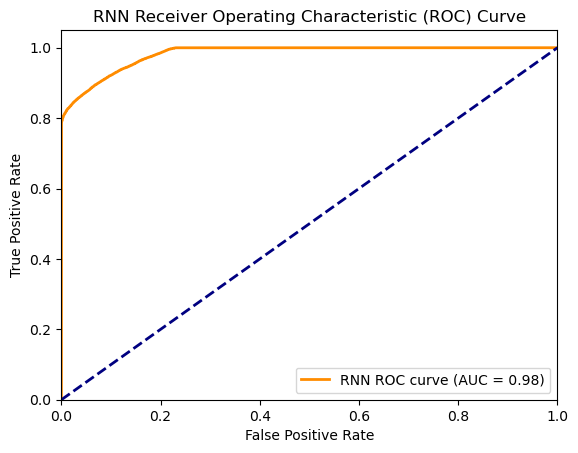

In [41]:
fpr, tpr, roc_auc = calculate_roc_curve(rnn_model, train_loader)
plot_roc_curve(fpr, tpr, roc_auc, 'RNN')

### **KDNN MODEL**

In [42]:
# Train the KDNN model using Keras
kdnn_model = create_kdnn_model()
kdnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
kdnn_model.fit( x_train, y_train, epochs=40, batch_size=batch_size)

Epoch 1/40


/Users/eddie/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


837/837 ━━━━━━━━━━━━━━━━━━━━ 1s 320us/step - accuracy: 0.8554 - loss: 0.4039
Epoch 2/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9065 - loss: 0.1613
Epoch 3/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9093 - loss: 0.1526
Epoch 4/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.9110 - loss: 0.1490
Epoch 5/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9128 - loss: 0.1500
Epoch 6/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9115 - loss: 0.1474
Epoch 7/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9122 - loss: 0.1483
Epoch 8/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.9077 - loss: 0.1517
Epoch 9/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9133 - loss: 0.1470
Epoch 10/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9131 - loss: 0.1477
Epoch 11/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.9103 - loss: 0.1491
Epoch 12/40
837/837 ━━━━━━━━━━━━━━━━━━━━ 

419/419 ━━━━━━━━━━━━━━━━━━━━ 0s 247us/step


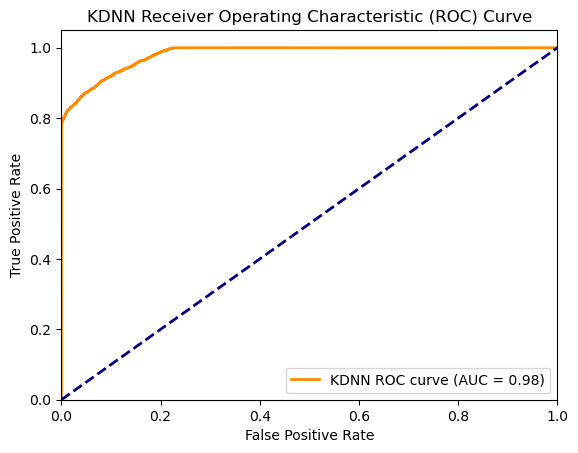

In [43]:
def calculate_roc_curve(model, X_test, y_test):
    y_pred = model.predict(X_test).ravel()
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

fpr, tpr, roc_auc = calculate_roc_curve(kdnn_model, x_test, y_test)
plot_roc_curve(fpr, tpr, roc_auc, 'KDNN')

### **ML ALGORITHMS**

In [44]:
!pip install catboost
from catboost import CatBoostClassifier

In [45]:
!pip install xgboost

Learning rate set to 0.056385
0:	learn: 0.5548972	total: 77.2ms	remaining: 1m 17s
1:	learn: 0.4549778	total: 82.1ms	remaining: 41s
2:	learn: 0.3802863	total: 86.6ms	remaining: 28.8s
3:	learn: 0.3245469	total: 90.8ms	remaining: 22.6s
4:	learn: 0.2876404	total: 95.3ms	remaining: 19s
5:	learn: 0.2576477	total: 101ms	remaining: 16.7s
6:	learn: 0.2337165	total: 105ms	remaining: 14.9s
7:	learn: 0.2160442	total: 110ms	remaining: 13.6s
8:	learn: 0.2021889	total: 115ms	remaining: 12.6s
9:	learn: 0.1968619	total: 119ms	remaining: 11.8s
10:	learn: 0.1891163	total: 125ms	remaining: 11.2s
11:	learn: 0.1826762	total: 129ms	remaining: 10.6s
12:	learn: 0.1778061	total: 135ms	remaining: 10.2s
13:	learn: 0.1726386	total: 140ms	remaining: 9.87s
14:	learn: 0.1690456	total: 145ms	remaining: 9.5s
15:	learn: 0.1667663	total: 149ms	remaining: 9.16s
16:	learn: 0.1648805	total: 154ms	remaining: 8.89s
17:	learn: 0.1626989	total: 158ms	remaining: 8.65s
18:	learn: 0.1606636	total: 163ms	remaining: 8.42s
19:	learn:

184:	learn: 0.1441123	total: 1.01s	remaining: 4.43s
185:	learn: 0.1440551	total: 1.01s	remaining: 4.43s
186:	learn: 0.1439894	total: 1.02s	remaining: 4.42s
187:	learn: 0.1439651	total: 1.02s	remaining: 4.41s
188:	learn: 0.1438606	total: 1.03s	remaining: 4.41s
189:	learn: 0.1438105	total: 1.03s	remaining: 4.4s
190:	learn: 0.1437740	total: 1.04s	remaining: 4.39s
191:	learn: 0.1437238	total: 1.04s	remaining: 4.38s
192:	learn: 0.1436811	total: 1.04s	remaining: 4.37s
193:	learn: 0.1436278	total: 1.05s	remaining: 4.37s
194:	learn: 0.1436010	total: 1.06s	remaining: 4.36s
195:	learn: 0.1435537	total: 1.06s	remaining: 4.35s
196:	learn: 0.1434910	total: 1.07s	remaining: 4.35s
197:	learn: 0.1434424	total: 1.07s	remaining: 4.34s
198:	learn: 0.1433975	total: 1.08s	remaining: 4.33s
199:	learn: 0.1433633	total: 1.08s	remaining: 4.33s
200:	learn: 0.1433019	total: 1.09s	remaining: 4.32s
201:	learn: 0.1432719	total: 1.09s	remaining: 4.31s
202:	learn: 0.1432439	total: 1.1s	remaining: 4.31s
203:	learn: 0.

344:	learn: 0.1364899	total: 1.81s	remaining: 3.45s
345:	learn: 0.1364505	total: 1.82s	remaining: 3.44s
346:	learn: 0.1364256	total: 1.83s	remaining: 3.44s
347:	learn: 0.1363938	total: 1.83s	remaining: 3.43s
348:	learn: 0.1363604	total: 1.83s	remaining: 3.42s
349:	learn: 0.1363162	total: 1.84s	remaining: 3.42s
350:	learn: 0.1362866	total: 1.84s	remaining: 3.41s
351:	learn: 0.1362529	total: 1.85s	remaining: 3.41s
352:	learn: 0.1362023	total: 1.85s	remaining: 3.4s
353:	learn: 0.1361639	total: 1.86s	remaining: 3.39s
354:	learn: 0.1361162	total: 1.86s	remaining: 3.39s
355:	learn: 0.1360867	total: 1.87s	remaining: 3.38s
356:	learn: 0.1360470	total: 1.88s	remaining: 3.38s
357:	learn: 0.1360045	total: 1.88s	remaining: 3.37s
358:	learn: 0.1359747	total: 1.88s	remaining: 3.36s
359:	learn: 0.1359362	total: 1.89s	remaining: 3.36s
360:	learn: 0.1358839	total: 1.89s	remaining: 3.35s
361:	learn: 0.1358226	total: 1.9s	remaining: 3.35s
362:	learn: 0.1357773	total: 1.9s	remaining: 3.34s
363:	learn: 0.1

506:	learn: 0.1295847	total: 2.63s	remaining: 2.56s
507:	learn: 0.1295539	total: 2.64s	remaining: 2.55s
508:	learn: 0.1295257	total: 2.64s	remaining: 2.55s
509:	learn: 0.1294890	total: 2.65s	remaining: 2.54s
510:	learn: 0.1294650	total: 2.65s	remaining: 2.54s
511:	learn: 0.1294287	total: 2.66s	remaining: 2.53s
512:	learn: 0.1293711	total: 2.66s	remaining: 2.53s
513:	learn: 0.1293404	total: 2.67s	remaining: 2.52s
514:	learn: 0.1292999	total: 2.67s	remaining: 2.52s
515:	learn: 0.1292533	total: 2.68s	remaining: 2.51s
516:	learn: 0.1292194	total: 2.68s	remaining: 2.51s
517:	learn: 0.1291781	total: 2.69s	remaining: 2.5s
518:	learn: 0.1291386	total: 2.69s	remaining: 2.5s
519:	learn: 0.1290955	total: 2.7s	remaining: 2.49s
520:	learn: 0.1290619	total: 2.71s	remaining: 2.49s
521:	learn: 0.1290342	total: 2.71s	remaining: 2.48s
522:	learn: 0.1290110	total: 2.71s	remaining: 2.48s
523:	learn: 0.1289729	total: 2.72s	remaining: 2.47s
524:	learn: 0.1289191	total: 2.73s	remaining: 2.46s
525:	learn: 0.1

665:	learn: 0.1237220	total: 3.44s	remaining: 1.72s
666:	learn: 0.1236954	total: 3.44s	remaining: 1.72s
667:	learn: 0.1236710	total: 3.45s	remaining: 1.71s
668:	learn: 0.1236400	total: 3.45s	remaining: 1.71s
669:	learn: 0.1236083	total: 3.46s	remaining: 1.7s
670:	learn: 0.1235747	total: 3.46s	remaining: 1.7s
671:	learn: 0.1235248	total: 3.47s	remaining: 1.69s
672:	learn: 0.1234748	total: 3.48s	remaining: 1.69s
673:	learn: 0.1234336	total: 3.48s	remaining: 1.68s
674:	learn: 0.1233885	total: 3.49s	remaining: 1.68s
675:	learn: 0.1233453	total: 3.49s	remaining: 1.67s
676:	learn: 0.1233202	total: 3.5s	remaining: 1.67s
677:	learn: 0.1232811	total: 3.5s	remaining: 1.66s
678:	learn: 0.1232584	total: 3.51s	remaining: 1.66s
679:	learn: 0.1232180	total: 3.51s	remaining: 1.65s
680:	learn: 0.1231827	total: 3.52s	remaining: 1.65s
681:	learn: 0.1231458	total: 3.52s	remaining: 1.64s
682:	learn: 0.1231234	total: 3.53s	remaining: 1.64s
683:	learn: 0.1230891	total: 3.53s	remaining: 1.63s
684:	learn: 0.12

863:	learn: 0.1170265	total: 4.45s	remaining: 700ms
864:	learn: 0.1170017	total: 4.45s	remaining: 695ms
865:	learn: 0.1169674	total: 4.46s	remaining: 690ms
866:	learn: 0.1169400	total: 4.46s	remaining: 685ms
867:	learn: 0.1169202	total: 4.47s	remaining: 680ms
868:	learn: 0.1168903	total: 4.47s	remaining: 675ms
869:	learn: 0.1168608	total: 4.48s	remaining: 669ms
870:	learn: 0.1168281	total: 4.48s	remaining: 664ms
871:	learn: 0.1167954	total: 4.49s	remaining: 659ms
872:	learn: 0.1167692	total: 4.5s	remaining: 654ms
873:	learn: 0.1167329	total: 4.5s	remaining: 649ms
874:	learn: 0.1167059	total: 4.5s	remaining: 644ms
875:	learn: 0.1166571	total: 4.51s	remaining: 638ms
876:	learn: 0.1166193	total: 4.51s	remaining: 633ms
877:	learn: 0.1165891	total: 4.52s	remaining: 628ms
878:	learn: 0.1165583	total: 4.53s	remaining: 623ms
879:	learn: 0.1165371	total: 4.53s	remaining: 618ms
880:	learn: 0.1165063	total: 4.54s	remaining: 613ms
881:	learn: 0.1164804	total: 4.54s	remaining: 608ms
882:	learn: 0.1

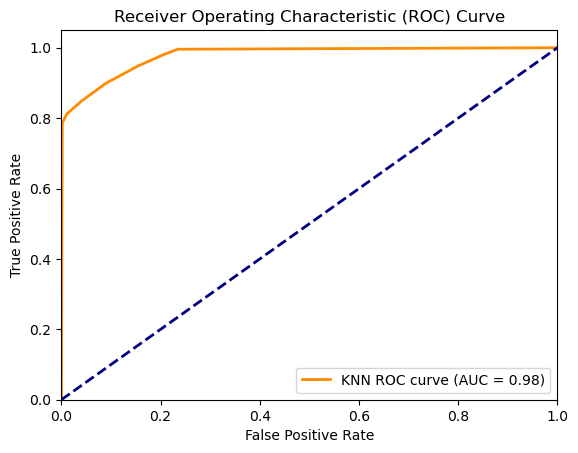

Decision Tree Metrics:
Accuracy: 0.9075
Precision: 0.9286
Recall: 0.8841
F1 Score: 0.9058
ROC AUC Score: 0.9076


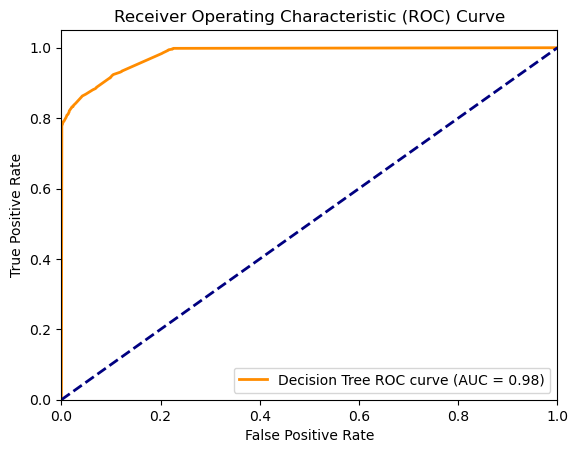

Random Forest Metrics:
Accuracy: 0.9093
Precision: 0.9647
Recall: 0.8510
F1 Score: 0.9043
ROC AUC Score: 0.9097


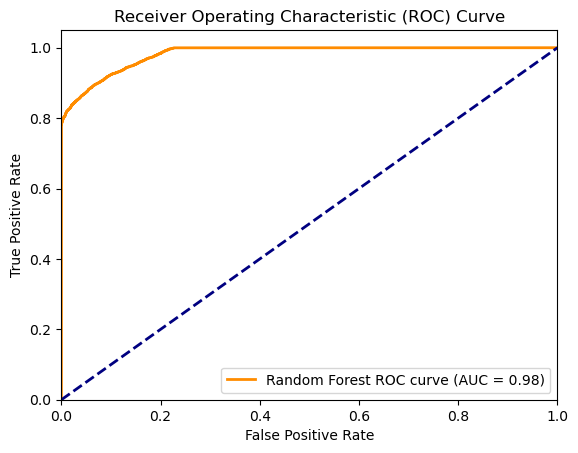

CatBoost Metrics:
Accuracy: 0.9061
Precision: 0.9234
Recall: 0.8871
F1 Score: 0.9049
ROC AUC Score: 0.9063


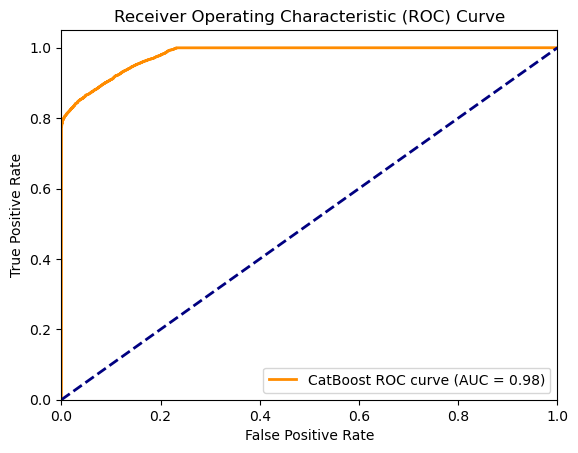

XGBoost Metrics:
Accuracy: 0.9112
Precision: 0.9366
Recall: 0.8833
F1 Score: 0.9092
ROC AUC Score: 0.9114


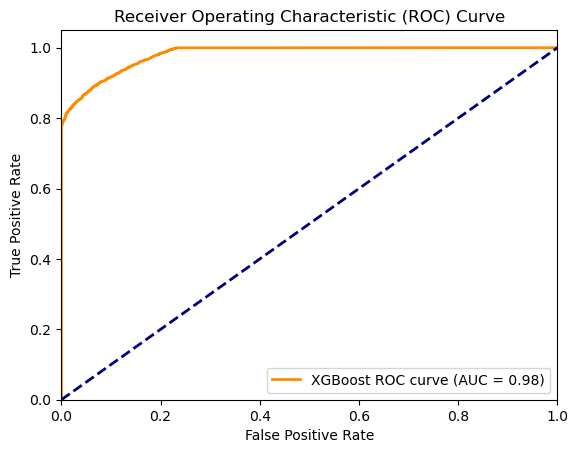

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import precision_score, f1_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to calculate ROC curve
def calculate_roc_curve(model, x_test, y_test):
    y_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = roc_auc_score(y_test, y_proba)
    return fpr, tpr, roc_auc

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Initialize KNN model with GridSearchCV
knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7]}
knn_grid = GridSearchCV(knn_model, knn_param_grid, cv=3, scoring='accuracy')
knn_grid.fit(x_train, y_train)
knn_model = knn_grid.best_estimator_

# Initialize Decision Tree model with GridSearchCV
dt_model = DecisionTreeClassifier(random_state=1)
dt_param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(dt_model, dt_param_grid, cv=3, scoring='accuracy')
dt_grid.fit(x_train, y_train)
dt_model = dt_grid.best_estimator_

# Initialize Random Forest model with GridSearchCV
rf_model = RandomForestClassifier(random_state=1)
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='accuracy')
rf_grid.fit(x_train, y_train)
rf_model = rf_grid.best_estimator_

# Initialize CatBoost model
catboost_model = CatBoostClassifier(random_state=1)
# Train CatBoost model
catboost_model.fit(x_train, y_train)

# Initialize XGBoost model with Extreme Gradient Boosting
xgb_model = XGBClassifier(random_state=1, booster='gbtree')
xgb_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy')
xgb_grid.fit(x_train, y_train)
xgb_model = xgb_grid.best_estimator_

# Evaluate models and print metrics
models = {'KNN': knn_model, 'Decision Tree': dt_model, 'Random Forest': rf_model, 'CatBoost': catboost_model, 'XGBoost': xgb_model}
for model_name, model in models.items():
    y_pred = model.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")

    # Plot ROC curve
    fpr, tpr, roc_auc = calculate_roc_curve(model, x_test, y_test)
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


## **ML ENSEMBLE**

In [47]:
from sklearn.ensemble import VotingClassifier

# Create the ensemble using VotingClassifier
ensemble_models = [('KNN', knn_model), ('Decision Tree', dt_model), ('Random Forest', rf_model), ('CatBoost', catboost_model), ('XGBoost', xgb_model)]
ensemble = VotingClassifier(estimators=ensemble_models, voting='soft')

# Train the ensemble model
ensemble.fit(x_train, y_train)

# Evaluate the ensemble model
ensemble_pred = ensemble.predict(x_test)
ensemble_accuracy = metrics.accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)
ensemble_f1 = f1_score(y_test, ensemble_pred)
ensemble_roc_auc = roc_auc_score(y_test, ensemble_pred)

print("Ensemble Metrics:")
print(f"Accuracy: {ensemble_accuracy:.4f}")
print(f"Precision: {ensemble_precision:.4f}")
print(f"Recall: {ensemble_recall:.4f}")
print(f"F1 Score: {ensemble_f1:.4f}")
print(f"ROC AUC Score: {ensemble_roc_auc:.4f}")


Learning rate set to 0.056385
0:	learn: 0.5548972	total: 5.15ms	remaining: 5.14s
1:	learn: 0.4549778	total: 10.1ms	remaining: 5.03s
2:	learn: 0.3802863	total: 15ms	remaining: 4.99s
3:	learn: 0.3245469	total: 20ms	remaining: 4.99s
4:	learn: 0.2876404	total: 25ms	remaining: 4.98s
5:	learn: 0.2576477	total: 29.9ms	remaining: 4.96s
6:	learn: 0.2337165	total: 34.8ms	remaining: 4.93s
7:	learn: 0.2160442	total: 39.3ms	remaining: 4.87s
8:	learn: 0.2021889	total: 44.5ms	remaining: 4.89s
9:	learn: 0.1968619	total: 49.3ms	remaining: 4.88s
10:	learn: 0.1891163	total: 54.1ms	remaining: 4.86s
11:	learn: 0.1826762	total: 58.8ms	remaining: 4.84s
12:	learn: 0.1778061	total: 63.9ms	remaining: 4.85s
13:	learn: 0.1726386	total: 68.6ms	remaining: 4.83s
14:	learn: 0.1690456	total: 73.4ms	remaining: 4.82s
15:	learn: 0.1667663	total: 78.3ms	remaining: 4.82s
16:	learn: 0.1648805	total: 83.3ms	remaining: 4.82s
17:	learn: 0.1626989	total: 88.1ms	remaining: 4.81s
18:	learn: 0.1606636	total: 92.6ms	remaining: 4.78

199:	learn: 0.1433633	total: 1s	remaining: 4.02s
200:	learn: 0.1433019	total: 1.01s	remaining: 4.02s
201:	learn: 0.1432719	total: 1.01s	remaining: 4.01s
202:	learn: 0.1432439	total: 1.02s	remaining: 4s
203:	learn: 0.1432149	total: 1.02s	remaining: 4s
204:	learn: 0.1431932	total: 1.03s	remaining: 3.99s
205:	learn: 0.1431302	total: 1.03s	remaining: 3.98s
206:	learn: 0.1430764	total: 1.04s	remaining: 3.98s
207:	learn: 0.1430222	total: 1.04s	remaining: 3.97s
208:	learn: 0.1429825	total: 1.05s	remaining: 3.97s
209:	learn: 0.1429015	total: 1.05s	remaining: 3.96s
210:	learn: 0.1428560	total: 1.06s	remaining: 3.96s
211:	learn: 0.1428074	total: 1.06s	remaining: 3.96s
212:	learn: 0.1427521	total: 1.07s	remaining: 3.95s
213:	learn: 0.1427066	total: 1.07s	remaining: 3.94s
214:	learn: 0.1426713	total: 1.08s	remaining: 3.94s
215:	learn: 0.1426170	total: 1.08s	remaining: 3.93s
216:	learn: 0.1425875	total: 1.09s	remaining: 3.93s
217:	learn: 0.1425437	total: 1.09s	remaining: 3.93s
218:	learn: 0.1424895

396:	learn: 0.1342690	total: 2.01s	remaining: 3.06s
397:	learn: 0.1342263	total: 2.02s	remaining: 3.05s
398:	learn: 0.1341945	total: 2.02s	remaining: 3.05s
399:	learn: 0.1341616	total: 2.03s	remaining: 3.04s
400:	learn: 0.1341149	total: 2.03s	remaining: 3.03s
401:	learn: 0.1340633	total: 2.04s	remaining: 3.03s
402:	learn: 0.1340283	total: 2.04s	remaining: 3.02s
403:	learn: 0.1339397	total: 2.04s	remaining: 3.02s
404:	learn: 0.1338932	total: 2.05s	remaining: 3.01s
405:	learn: 0.1338475	total: 2.06s	remaining: 3.01s
406:	learn: 0.1338033	total: 2.06s	remaining: 3s
407:	learn: 0.1337635	total: 2.07s	remaining: 3s
408:	learn: 0.1337030	total: 2.07s	remaining: 2.99s
409:	learn: 0.1336661	total: 2.08s	remaining: 2.99s
410:	learn: 0.1336104	total: 2.08s	remaining: 2.98s
411:	learn: 0.1335671	total: 2.09s	remaining: 2.98s
412:	learn: 0.1335247	total: 2.09s	remaining: 2.98s
413:	learn: 0.1334444	total: 2.1s	remaining: 2.97s
414:	learn: 0.1334061	total: 2.1s	remaining: 2.96s
415:	learn: 0.133368

556:	learn: 0.1276826	total: 2.82s	remaining: 2.24s
557:	learn: 0.1276565	total: 2.83s	remaining: 2.24s
558:	learn: 0.1276237	total: 2.83s	remaining: 2.23s
559:	learn: 0.1275995	total: 2.84s	remaining: 2.23s
560:	learn: 0.1275530	total: 2.84s	remaining: 2.22s
561:	learn: 0.1275195	total: 2.85s	remaining: 2.22s
562:	learn: 0.1274783	total: 2.85s	remaining: 2.21s
563:	learn: 0.1274368	total: 2.86s	remaining: 2.21s
564:	learn: 0.1273737	total: 2.86s	remaining: 2.2s
565:	learn: 0.1273389	total: 2.87s	remaining: 2.2s
566:	learn: 0.1272993	total: 2.87s	remaining: 2.19s
567:	learn: 0.1272586	total: 2.88s	remaining: 2.19s
568:	learn: 0.1272233	total: 2.88s	remaining: 2.18s
569:	learn: 0.1271852	total: 2.89s	remaining: 2.18s
570:	learn: 0.1271518	total: 2.89s	remaining: 2.17s
571:	learn: 0.1271033	total: 2.9s	remaining: 2.17s
572:	learn: 0.1270653	total: 2.9s	remaining: 2.16s
573:	learn: 0.1270340	total: 2.91s	remaining: 2.16s
574:	learn: 0.1269815	total: 2.91s	remaining: 2.15s
575:	learn: 0.12

720:	learn: 0.1217883	total: 3.63s	remaining: 1.41s
721:	learn: 0.1217498	total: 3.64s	remaining: 1.4s
722:	learn: 0.1217085	total: 3.64s	remaining: 1.4s
723:	learn: 0.1216657	total: 3.65s	remaining: 1.39s
724:	learn: 0.1216189	total: 3.65s	remaining: 1.39s
725:	learn: 0.1215876	total: 3.66s	remaining: 1.38s
726:	learn: 0.1215567	total: 3.66s	remaining: 1.38s
727:	learn: 0.1215408	total: 3.67s	remaining: 1.37s
728:	learn: 0.1215104	total: 3.67s	remaining: 1.37s
729:	learn: 0.1214690	total: 3.68s	remaining: 1.36s
730:	learn: 0.1214290	total: 3.68s	remaining: 1.35s
731:	learn: 0.1213800	total: 3.69s	remaining: 1.35s
732:	learn: 0.1213593	total: 3.69s	remaining: 1.34s
733:	learn: 0.1213213	total: 3.7s	remaining: 1.34s
734:	learn: 0.1212838	total: 3.71s	remaining: 1.34s
735:	learn: 0.1212535	total: 3.71s	remaining: 1.33s
736:	learn: 0.1212325	total: 3.72s	remaining: 1.33s
737:	learn: 0.1211921	total: 3.72s	remaining: 1.32s
738:	learn: 0.1211609	total: 3.73s	remaining: 1.32s
739:	learn: 0.1

911:	learn: 0.1155420	total: 4.65s	remaining: 448ms
912:	learn: 0.1155084	total: 4.65s	remaining: 443ms
913:	learn: 0.1154794	total: 4.66s	remaining: 438ms
914:	learn: 0.1154575	total: 4.66s	remaining: 433ms
915:	learn: 0.1154330	total: 4.67s	remaining: 428ms
916:	learn: 0.1154101	total: 4.67s	remaining: 423ms
917:	learn: 0.1153864	total: 4.67s	remaining: 418ms
918:	learn: 0.1153440	total: 4.68s	remaining: 413ms
919:	learn: 0.1153256	total: 4.69s	remaining: 408ms
920:	learn: 0.1152873	total: 4.69s	remaining: 402ms
921:	learn: 0.1152525	total: 4.7s	remaining: 397ms
922:	learn: 0.1152214	total: 4.7s	remaining: 392ms
923:	learn: 0.1152012	total: 4.71s	remaining: 387ms
924:	learn: 0.1151664	total: 4.71s	remaining: 382ms
925:	learn: 0.1151359	total: 4.72s	remaining: 377ms
926:	learn: 0.1151017	total: 4.72s	remaining: 372ms
927:	learn: 0.1150740	total: 4.73s	remaining: 367ms
928:	learn: 0.1150469	total: 4.73s	remaining: 362ms
929:	learn: 0.1150111	total: 4.74s	remaining: 357ms
930:	learn: 0.

## ALL ENSEMBLE

In [48]:
class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)
        return predictions

    def predict_proba(self, X):
        X_tensor = torch.tensor(X, dtype=torch.float32)
        outputs = self.rnn_model(X_tensor)
        probabilities = torch.sigmoid(outputs).detach().numpy()
        return np.column_stack((1 - probabilities, probabilities))

class KerasWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, keras_model):
        self.keras_model = keras_model

    def fit(self, X, y):
        return self

    def predict(self, X):
        return np.round(self.keras_model.predict(X)).astype(int)

    def predict_proba(self, X):
        probabilities = self.keras_model.predict(X)
        return np.column_stack((1 - probabilities, probabilities))


all_ensemble = VotingClassifier(estimators=[
    ('rnn', RNNWrapper(rnn_model)),
    ('keras', KerasWrapper(kdnn_model)),
    ('KNN', knn_model),
    ('Decision Tree', dt_model),
    ('Random Forest', rf_model),
    ('CatBoost', catboost_model),
    ('XGBoost', xgb_model)
], voting='hard')


all_ensemble.fit(x_train, y_train)


all_pred = ensemble.predict(x_test)
accuracy = accuracy_score(y_test, all_pred)
print("Accuracy of Ensemble of DL and ML:", accuracy)

NameError: name 'BaseEstimator' is not defined

## **STACKING OF ML ENSEMBLE, RNN_MODEL, and KDNN_MODEL**

In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingCVClassifier
import torch

class RNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, rnn_model):
        self.rnn_model = rnn_model

    def fit(self, X, y):
        # No fitting is needed for the RNN model as it's already trained externally
        return self

    def predict(self, X):
        # Convert input to PyTorch tensor
        X_tensor = torch.tensor(X, dtype=torch.float32)

        # Predict using the RNN model
        outputs = self.rnn_model(X_tensor)
        predictions = torch.round(outputs).detach().numpy()

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"RNN predictions shape: {predictions.shape}")

        return predictions

class KDNNWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, kdnn_model):
        self.kdnn_model = kdnn_model

    def fit(self, X, y):
        # No fitting is needed for the K-DNN model as it's already trained externally
        return self

    def predict(self, X):
        # Predict using the K-DNN model
        predictions = self.kdnn_model.predict(X)

        # Ensure predictions have the same number of dimensions as the input data
        if len(predictions.shape) == 2 and predictions.shape[1] == 1:
            predictions = predictions.squeeze(1)

        # print(f"Input data shape: {X.shape}")
        # print(f"K-DNN predictions shape: {predictions.shape}")

        return predictions

# Wrap the RNN model and K-DNN model
rnn_wrapper = RNNWrapper(rnn_model)
kdnn_wrapper = KDNNWrapper(kdnn_model)

# Stacking the ensemble with deep learning models and Logistic Regression
ensemble_stack = StackingCVClassifier(classifiers=[ensemble, rnn_wrapper, kdnn_wrapper],
                                       meta_classifier=LogisticRegression(),
                                       random_state=1)

# Train the stacked model
ensemble_stack.fit(x_train, y_train)

# Evaluate the stacked model
stacked_pred = ensemble_stack.predict(x_test)
stacked_accuracy = metrics.accuracy_score(y_test, stacked_pred)
stacked_precision = precision_score(y_test, stacked_pred)
stacked_recall = recall_score(y_test, stacked_pred)
stacked_f1 = f1_score(y_test, stacked_pred)
stacked_roc_auc = roc_auc_score(y_test, stacked_pred)

print("Stacked Model Metrics:")
print(f"Accuracy: {stacked_accuracy:.4f}")
print(f"Precision: {stacked_precision:.4f}")
print(f"Recall: {stacked_recall:.4f}")
print(f"F1 Score: {stacked_f1:.4f}")
print(f"ROC AUC Score: {stacked_roc_auc:.4f}")

## **ROC Curve and Confusion Matrix for ML Ensemble**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# Plot ROC curve for ML ensemble
ensemble_probs = ensemble.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, ensemble_probs)
roc_auc_ensemble = roc_auc_score(y_test, ensemble_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_ensemble, tpr_ensemble, label=f'ML Ensemble (ROC AUC = {roc_auc_ensemble:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - ML Ensemble')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_ensemble:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for ML Ensemble
cm_ensemble = confusion_matrix(y_test, ensemble_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_ensemble, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - ML Ensemble')
plt.show()


## **ROC Curve and Confusion Matrix for Ensemble Stacking Classifier (ML Ensemble, RNN, DNN)**

In [ ]:
# Plot ROC curve for Stacking classifier
stacked_probs = ensemble_stack.predict_proba(x_test)[:, 1]  # Probability estimates of the positive class
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, stacked_probs)
roc_auc_stacked = roc_auc_score(y_test, stacked_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_stacked, tpr_stacked, label=f'Stacking Classifier (ROC AUC = {roc_auc_stacked:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Classifier')
plt.legend()
plt.grid(True)

# Print ROC AUC score on the graph
plt.text(0.6, 0.2, f'ROC AUC = {roc_auc_stacked:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

# Confusion Matrix for Stacking classifier
cm_stacked = confusion_matrix(y_test, stacked_pred)
plt.figure(figsize=(8, 6))
plot_confusion_matrix(conf_mat=cm_stacked, show_normed=True, cmap='YlOrRd')
plt.title('Confusion Matrix - Stacking Classifier')
plt.show()
